In [1]:
import numpy as np
from homography import pyrs12, spaces
import cv2, h5py, deproject, HandShapeAnalysis
import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(threshold=np.inf)

In [53]:
def plt_imsize(image,size=(20,20)):
    fig1 = plt.figure(figsize=size) # create a figure with the default size 
    ax1 = fig1.add_subplot(1,1,1) 
    ax1.imshow(image, interpolation='none')
    plt.show()

In [4]:
one = h5py.File('../recording_data/labeled/1_move_down_yes.hdf5', 'r')
org = one['pcl_center'][...]
mat = one['trans_matrix'][...]

In [5]:
np.linalg.inv(mat)

array([[-0.99993485, -0.00974962,  0.00734819],
       [-0.01154091,  0.6239261 , -0.7819035 ],
       [ 0.00104568, -0.7814248 , -0.62335753]], dtype=float32)

In [6]:
org

array([-0.02304791,  0.0055409 ,  0.36371115], dtype=float32)

In [7]:
mat

array([[-0.99992555, -0.01181953,  0.00303853],
       [-0.00801172,  0.6233078 , -0.7819356 ],
       [ 0.00836591, -0.7813823 , -0.62399656]], dtype=float32)

In [8]:
def without_table(image, mat, org, show = False):
    cloud = deproject.compute(image.astype(np.short()))
    pointo = (np.dot(np.linalg.inv(mat), cloud.reshape((-1,3)).T).T + org)
    point = pointo.reshape((480,640,3))
    boo = (image != 0) & (point[:,:,2]>0.138)
    if show:
        plt.imshow(np.where(boo, point[:,:,2] , 0))
    return pointo, point[boo].reshape((-1,3))

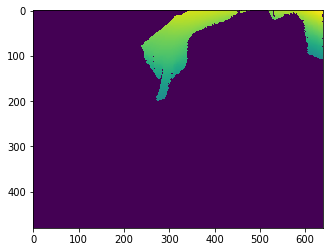

In [9]:
import pptk
slices = np.index_exp[len(one['color'])-1] 
pointo, point = without_table(one['depth'][slices], mat, org, True)
# pptk.viewer(point)

In [10]:
print(np.max(point[:,0]))
print(np.min(point[:,0]))
print(np.max(point[:,1]))
print(np.min(point[:,1]))

0.052029897
-0.4858645
-0.34173718
-0.7625815


In [11]:
point[:,0] = point[:,0]+np.abs(np.min(point[:,0]))
point[:,1] = point[:,1]+np.abs(np.min(point[:,1]))
point[:,0] = point[:,0]/np.max(point[:,0])
point[:,1] = point[:,1]/np.max(point[:,1])

\begin{equation}
  \begin{bmatrix}
    O_{1x} & O_{1y} & O_{1z}\\
    O_{2x} & O_{2y} & O_{2z}\\
    \vdots \\
    O_{nx} & O_{ny} & O_{nz}\\
  \end{bmatrix}
  \begin{bmatrix}
  X & 0 &0\\
  0 & Y &0\\
  0 & 0 &1\\
  \end{bmatrix}
  =
    \begin{bmatrix}
    O_{1x} & O_{1y} & O_{1z}\\
    O_{2x} & O_{2y} & O_{2z}\\
    \vdots \\
    O_{nx} & O_{ny} & O_{nz}\\
  \end{bmatrix}
\end{equation}

X,Y :scale factor, size of the image 

In [12]:
core = np.array([[490,0,0],[0,490,0],[0,0,1]])
r = np.dot(point, core)
r = r[np.argsort(r[:,2])]
image = np.zeros((500, 500))
image[r[:,1].astype(np.int),r[:,0].astype(np.int)] = r[:,2]
image = image[:,::-1]
##point cloud left x increase, however image reduce to 0, so [:,1] to show

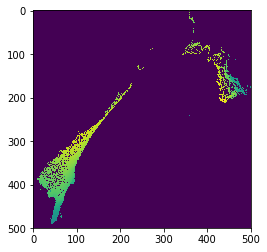

In [13]:
plt.imshow(image)

In [14]:
slice_ = np.index_exp[300:,:150]

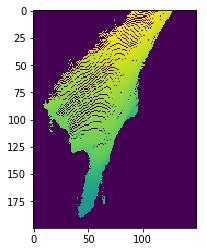

In [15]:
plt.imshow(image[slice_])

In [16]:
analyser = HandShapeAnalysis.Depth2Finger(org, mat)
analyser.set_show(debug = True, finger_point_image = True, hull_image = True, detected_defect = True, cluster_point= True,  possibility_modal = False)

In [17]:
imagenew = (image/np.max(image)*255).astype(np.uint8)

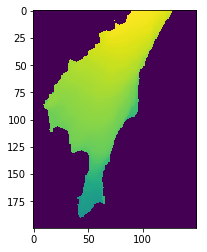

In [18]:
plt.imshow(HandShapeAnalysis.analysis_image(imagenew[slice_]))

In [19]:
analyser.renew_test(HandShapeAnalysis.analysis_image(imagenew[slice_]))

[[127   0]
 [ 95  93]
 [ 65 177]
 [ 43 188]
 [ 15 109]
 [ 14  77]
 [ 33  45]
 [ 60  21]
 [ 90   0]]
[127.31601817 125.75388725 175.99582706 138.31094151  44.86903845
  76.05190382 142.69931514]


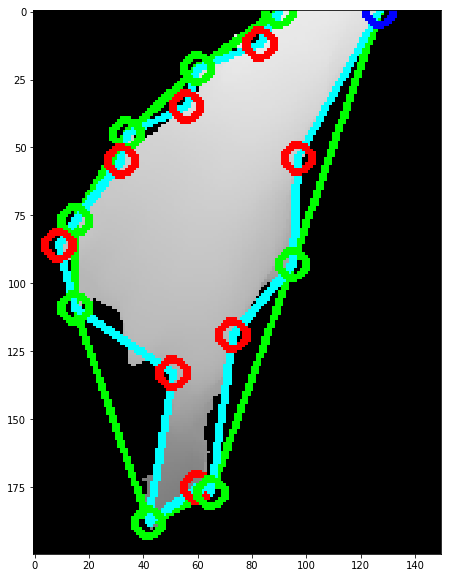

In [20]:
plt_imsize(analyser.detected_defect)

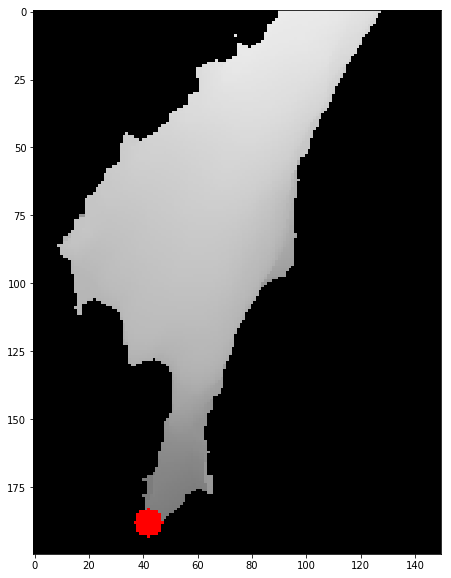

In [21]:
plt_imsize(analyser.finger_point_image)

In [22]:
analyser.finger_point

array([[ 42, 188]], dtype=int32)

In [23]:
x = analyser.finger_point[0][0]
y = analyser.finger_point[0][1]

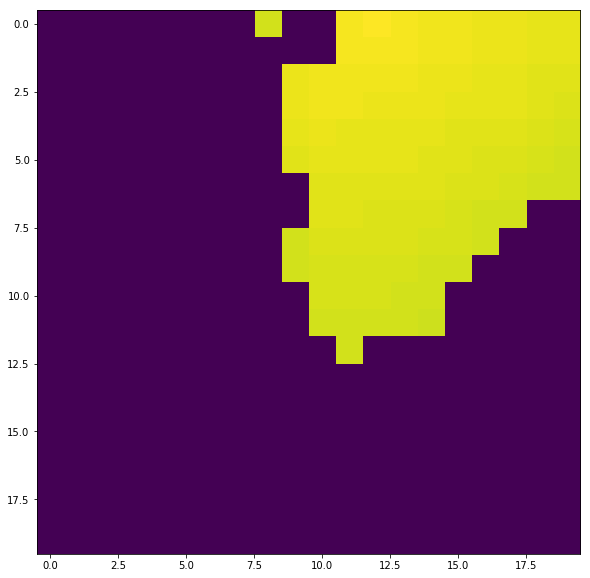

In [25]:
plt_imsize(imagenew[slice_][y-10:y+10, x-10:x+10])

In [26]:
print(imagenew[slice_][y-10:y+10, x-10:x+10])

[[  0   0   0   0   0   0   0   0 123   0   0 130 132 130 129 129 128 128
  127 127]
 [  0   0   0   0   0   0   0   0   0   0   0 130 130 130 129 129 128 128
  127 127]
 [  0   0   0   0   0   0   0   0   0 128 129 129 129 129 128 128 127 127
  126 126]
 [  0   0   0   0   0   0   0   0   0 128 129 129 128 128 128 127 127 127
  126 125]
 [  0   0   0   0   0   0   0   0   0 127 128 127 127 127 127 126 126 126
  125 124]
 [  0   0   0   0   0   0   0   0   0 126 127 127 127 127 126 126 125 125
  124 123]
 [  0   0   0   0   0   0   0   0   0   0 126 126 126 126 126 125 125 124
  123 123]
 [  0   0   0   0   0   0   0   0   0   0 126 126 125 125 125 124 123 123
    0   0]
 [  0   0   0   0   0   0   0   0   0 123 125 125 125 125 124 124 123   0
    0   0]
 [  0   0   0   0   0   0   0   0   0 123 124 124 124 124 123 123   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0 124 124 124 123 123   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0 123 123 123 123 122   0

(array([293.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 107.]),
 array([0.        , 0.01484638, 0.02969277, 0.04453915, 0.05938554,
        0.07423192, 0.08907831, 0.10392469, 0.11877108, 0.13361746,
        0.14846385]),
 <a list of 10 Patch objects>)

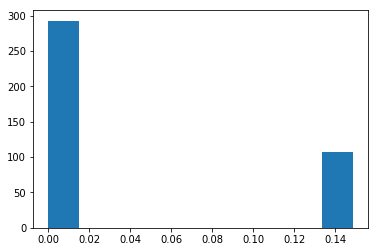

In [27]:
plt.hist(image[slice_][y-10:y+10, x-10:x+10].ravel())

In [28]:
!ls ../recording_data/labeled

1_move_down_not.hdf5  1_move_right_yes.hdf5 2_move_right_no.hdf5
1_move_down_yes.hdf5  2_move_down_no.hdf5   2_move_right_yes.hdf5
1_move_right_not.hdf5 2_move_down_yes.hdf5  4_move_down_yes.hdf5


In [29]:
one = h5py.File('../recording_data/labeled/1_move_down_not.hdf5', 'r')
org = one['pcl_center'][...]
mat = one['trans_matrix'][...]

In [30]:
frame = len(one['depth'])-1

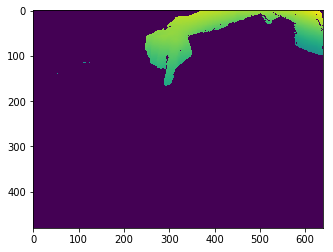

In [31]:
point = deproject.compute(one['depth'][frame].astype(np.short()))
pointo, point = without_table(one['depth'][frame], mat, org, True)

In [32]:
print(np.max(point[:,0]))
print(np.min(point[:,0]))
print(np.max(point[:,1]))
print(np.min(point[:,1]))

0.28174558
-0.5066497
-0.34532866
-0.79780376


In [33]:
point[:,0] = point[:,0]+np.abs(np.min(point[:,0]))
point[:,1] = point[:,1]+np.abs(np.min(point[:,1]))
point[:,0] = point[:,0]/np.max(point[:,0])
point[:,1] = point[:,1]/np.max(point[:,1])

In [34]:
core = np.array([[490,0,0],[0,490,0],[0,0,1]])
r = np.dot(point, core)
r = r[np.argsort(r[:,2])]
image = np.zeros((500, 500))
image[r[:,1].astype(np.int),r[:,0].astype(np.int)] = r[:,2]
image = image[:,::-1]
##point cloud left x increase, however image reduce to 0, so [:,1] to show

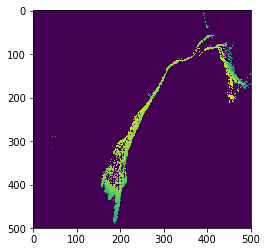

In [35]:
plt.imshow(image)

In [36]:
roi = np.index_exp[350:,100:300]

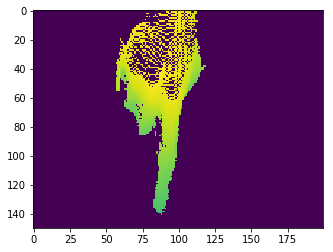

In [37]:
plt.imshow(image[roi])

In [38]:
imagenew = (image/np.max(image)*255).astype(np.uint8)

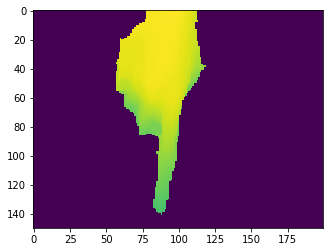

In [39]:
plt.imshow(HandShapeAnalysis.analysis_image(imagenew[roi]))

In [40]:
analyser.renew_test((HandShapeAnalysis.analysis_image(imagenew[roi])))

[[118  38]
 [ 88 136]
 [ 58  36]
 [ 78   0]
 [113   0]]
[127.87498365 144.18883608  11.99726245]


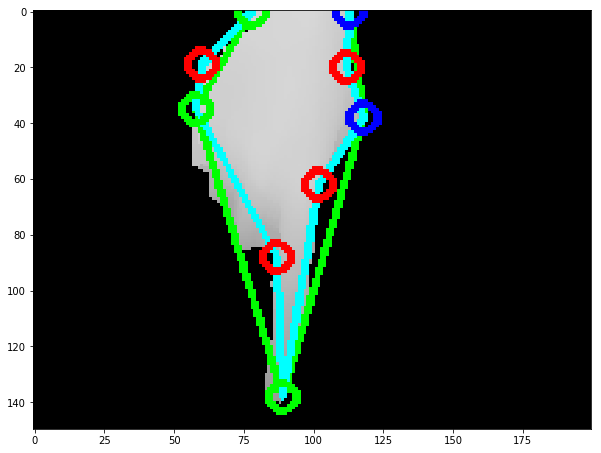

In [41]:
plt_imsize(analyser.detected_defect)

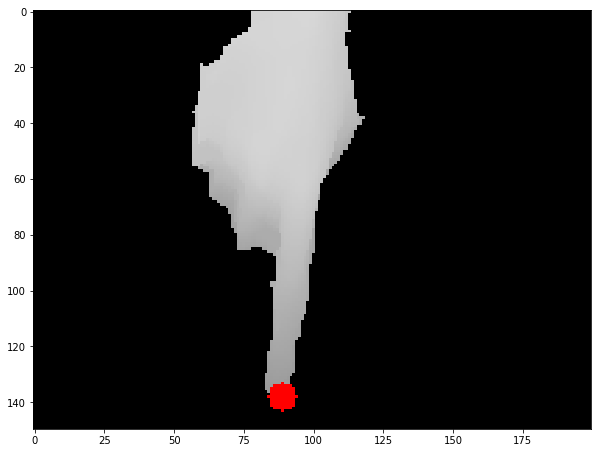

In [42]:
plt_imsize(analyser.finger_point_image)

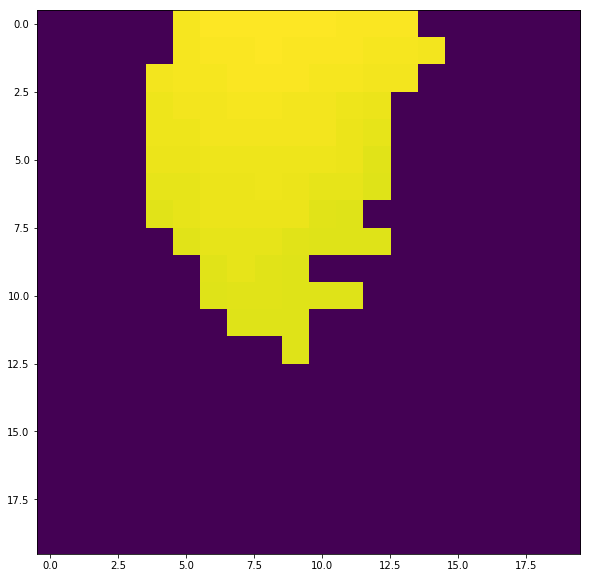

In [43]:
x = analyser.finger_point[0][0]
y = analyser.finger_point[0][1]
plt_imsize(imagenew[roi][y-10:y+10, x-10:x+10])

In [44]:
print(imagenew[roi][y-10:y+10, x-10:x+10])

[[  0   0   0   0   0 159 161 161 161 161 161 160 160 160   0   0   0   0
    0   0]
 [  0   0   0   0   0 159 160 160 161 160 160 160 159 159 158   0   0   0
    0   0]
 [  0   0   0   0 158 159 159 160 160 160 159 159 158 158   0   0   0   0
    0   0]
 [  0   0   0   0 157 158 158 159 159 158 158 157 156   0   0   0   0   0
    0   0]
 [  0   0   0   0 157 157 158 158 158 158 158 156 155   0   0   0   0   0
    0   0]
 [  0   0   0   0 156 156 157 157 157 157 157 156 154   0   0   0   0   0
    0   0]
 [  0   0   0   0 155 155 156 156 157 156 155 155 153   0   0   0   0   0
    0   0]
 [  0   0   0   0 154 155 156 156 156 156 154 153   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0 154 155 155 155 154 153 153 153   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0 154 155 154 153   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0 153 154 154 153 153 153   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0 153 153 153   0   0   0   0   0   0

(array([305.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  95.]),
 array([0.        , 0.01792011, 0.03584022, 0.05376032, 0.07168043,
        0.08960054, 0.10752065, 0.12544076, 0.14336087, 0.16128097,
        0.17920108]),
 <a list of 10 Patch objects>)

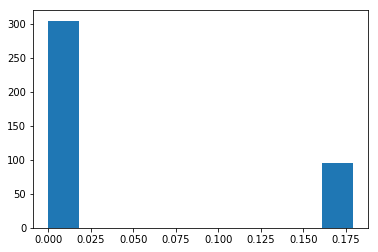

In [45]:
plt.hist(image[roi][y-10:y+10, x-10:x+10].ravel())

In [52]:
not 0

True

In [ ]:
def sc_any(array):
    for x in array.flat:
        if not x:
            return True
    return False